In [3]:
import numpy as np 
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler


In [4]:
# 1. Load the MNIST dataset
mnist = pd.read_csv('mnist_train.csv')

In [5]:

# 2. Split into features (X) and labels (y)
y = mnist.iloc[:, 0].values   # First column is the label
X = mnist.iloc[:, 1:].values  # Remaining columns are pixel values

# Print shapes to verify
print("Shape of X:", X.shape)  # Should be (num_samples, 784)
print("Shape of y:", y.shape)  # Should be (num_samples,) 

# 2. Normalize pixel values (0-255 -> 0-1)
X = X/255.0  

# 3. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Shape of X: (60000, 784)
Shape of y: (60000,)


In [6]:
# 4. Initialize and train KNN model (using 3 nearest neighbors)
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)  # Use multiple CPU cores for speed
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [7]:
# 5. Evaluate accuracy
accuracy = knn.score(X_test, y_test)
print(f"KNN Model Accuracy: {accuracy * 100:.2f}%")

c:\Users\schak\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\schak\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\schak\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\schak\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036

KNN Model Accuracy: 97.41%


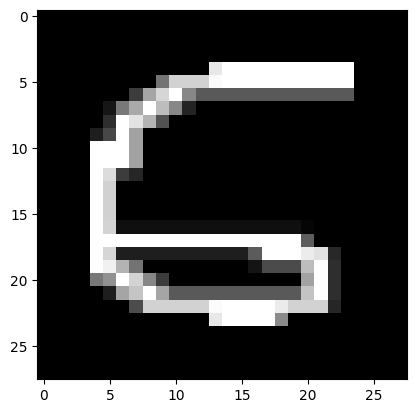

Processed Image Shape: (1, 784)


In [13]:
import numpy as np
import tkinter as tk
from tkinter import Canvas
from PIL import Image, ImageDraw, ImageOps
import cv2
import matplotlib.pyplot as plt

class DigitRecognizerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Draw a Digit")
        self.canvas = Canvas(root, width=280, height=280, bg="white")
        self.canvas.pack()
        self.button = tk.Button(root, text="Predict", command=self.predict_digit)
        self.button.pack()
        self.canvas.bind("<B1-Motion>", self.draw)
        self.image = Image.new("L", (280, 280), 255)
        self.draw = ImageDraw.Draw(self.image)

    def draw(self, event):
        x, y = event.x, event.y
        self.canvas.create_oval(x, y, x+10, y+10, fill="black", width=10)
        self.draw.ellipse([x, y, x+10, y+10], fill=0)

    def preprocess_image(self, img):
        # Convert to grayscale (L mode ensures 8-bit pixels)
        img = img.convert("L")  

        # Resize to 28x28 pixels (same as MNIST dataset)
        img = img.resize((28, 28))

        # Convert image to NumPy array
        img = np.array(img)

        # Apply binary thresholding
        _, img = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)

        # Find bounding box of the digit
        coords = cv2.findNonZero(img)  # Find non-zero pixels
        x, y, w, h = cv2.boundingRect(coords)  # Get bounding box

        # Crop the region containing the digit
        img = img[y:y+h, x:x+w]

        # Resize back to 28x28 (preserving aspect ratio)
        img = cv2.resize(img, (20, 20), interpolation=cv2.INTER_AREA)

        # Create a blank 28x28 image and paste the resized digit in the center
        blank_image = np.zeros((28, 28), dtype=np.uint8)
        x_offset = (28 - img.shape[1]) // 2
        y_offset = (28 - img.shape[0]) // 2
        blank_image[y_offset:y_offset+img.shape[0], x_offset:x_offset+img.shape[1]] = img

        # Normalize pixel values (MNIST uses values between 0 and 1)
        blank_image = blank_image / 255.0  

        # Flatten image to match KNN input format (1D array of 784 values)
        blank_image = blank_image.reshape(1, -1)  

        return blank_image

    def predict_digit(self):
        # Convert canvas to image
        img = self.image

        # Preprocess image before prediction
        img = self.preprocess_image(img)

        # Debugging: Show the processed image
        plt.imshow(img.reshape(28, 28), cmap="gray")
        plt.show()

        print(f"Processed Image Shape: {img.shape}")

        # Predict digit using KNN
        pred = knn.predict(img)

        # Display prediction
        tk.Label(self.root, text=f"Prediction: {pred[0]}", font=("Arial", 20)).pack()

if __name__ == "__main__":
    root = tk.Tk()
    app = DigitRecognizerApp(root)
    root.mainloop()
